#### <i> Machine Learning-Based Risk Prediction Model for Loan Applications Enhancing Decision-Making and Default Prevention </i>
#### <i> Dataset Link --> https://www.kaggle.com/datasets/vedaantsingh/loan-application-risk-prediction-data </i>
#### <i> Import Library Files </i>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


#### <i> Load The Main Dataset </i>

In [4]:
df = pd.read_csv("loan_applications.csv")
df

,UID,ApplicationDate,Amount,Term,EmploymentType,LoanPurpose,Success
0,4921736,03/07/2020,2000,60,Employed - full time,Unexpected bills,0
1,1241981,04/02/2020,3000,60,Employed - full time,Starting new bussniess,0
2,5751748,02/08/2020,20000,60,Employed - full time,Business capital,0
3,7163425,23/09/2020,20000,60,Self employed,New business venture,0
4,227377,01/01/2020,5000,36,Employed - full time,car,0
...,...,...,...,...,...,...,...
8842,8681053,17/11/2020,5000,60,Employed - full time,Wedding,0
8843,8768469,20/11/2020,8000,24,Employed - full time,Wedding,0
8844,8794971,22/11/2020,1000,36,Employed - full time,Wedding deposit,0
8845,8875138,24/11/2020,10000,60,Self employed,Wedding,0


#### <i> Dataset Overview </i>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8847 entries, 0 to 8846
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   UID              8847 non-null   int64 
 1   ApplicationDate  8847 non-null   object
 2   Amount           8847 non-null   int64 
 3   Term             8847 non-null   int64 
 4   EmploymentType   8847 non-null   object
 5   LoanPurpose      8847 non-null   object
 6   Success          8847 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 483.9+ KB


In [7]:
df.describe()

,UID,Amount,Term,Success
count,8.847000e+03,8847.000000,8847.000000,8847.000000
mean,4.753101e+06,7560.692438,41.985080,0.104216
std,2.766232e+06,5309.138911,16.139168,0.305558
min,2.160090e+05,500.000000,12.000000,0.000000
25%,2.376933e+06,3000.000000,24.000000,0.000000
50%,4.463541e+06,6500.000000,48.000000,0.000000
75%,7.194733e+06,10000.000000,60.000000,0.000000
max,9.684478e+06,20000.000000,60.000000,1.000000


#### <i> Little Preprocessing </i>

In [9]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Handle missing values (if any)
df = df.dropna()  # Drop rows with missing values

# Convert date column to datetime format
df['ApplicationDate'] = pd.to_datetime(df['ApplicationDate'], errors='coerce')

# Encode categorical variables (EmploymentType, LoanPurpose)
df['EmploymentType'] = df['EmploymentType'].astype('category').cat.codes
df['LoanPurpose'] = df['LoanPurpose'].astype('category').cat.codes

# Display dataset after preprocessing
print(df.head())


Missing Values:
 UID                0
ApplicationDate    0
Amount             0
Term               0
EmploymentType     0
LoanPurpose        0
Success            0
dtype: int64
       UID ApplicationDate  Amount  Term  EmploymentType  LoanPurpose  Success
0  4921736      2020-03-07    2000    60               0         1536        0
1  1241981      2020-04-02    3000    60               0         1450        0
2  5751748      2020-02-08   20000    60               0          126        0
3  7163425             NaT   20000    60               3         1121        0
4   227377      2020-01-01    5000    36               0         1705        0


### <i> Expolatory Data Analysis And Visulization </i>

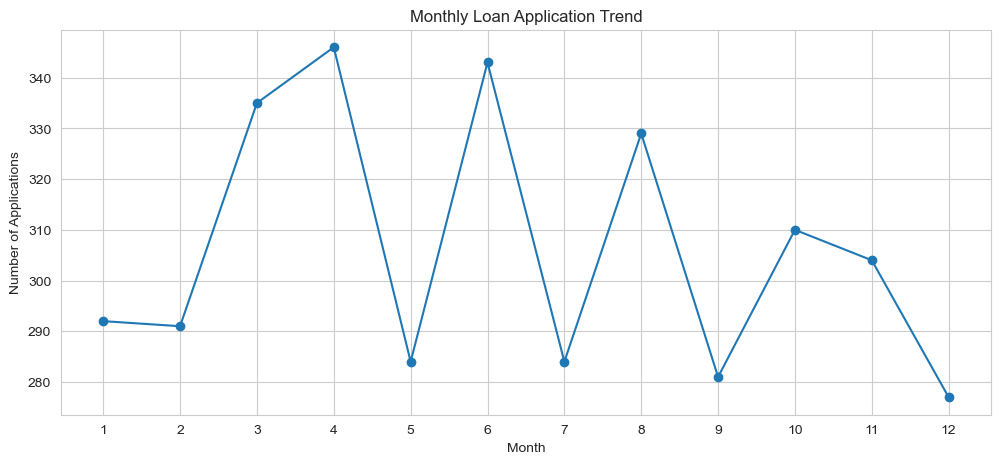

In [11]:
# Set style
sns.set_style("whitegrid")

# 1. Loan Application Trend Over Time
plt.figure(figsize=(12, 5))
df.groupby(df['ApplicationDate'].dt.month)['UID'].count().plot(kind='line', marker='o')
plt.title("Monthly Loan Application Trend")
plt.xlabel("Month")
plt.ylabel("Number of Applications")
plt.xticks(range(1, 13))
plt.show()

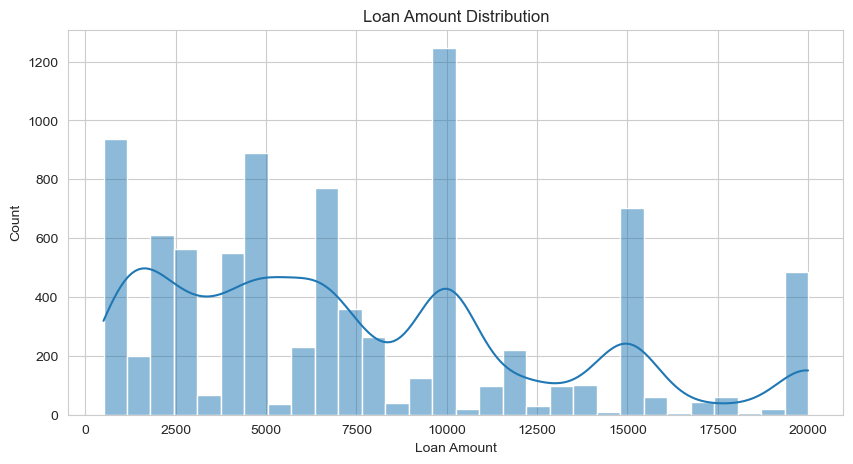

In [12]:
# 2. Loan Amount Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Amount'], bins=30, kde=True)
plt.title("Loan Amount Distribution")
plt.xlabel("Loan Amount")
plt.show()

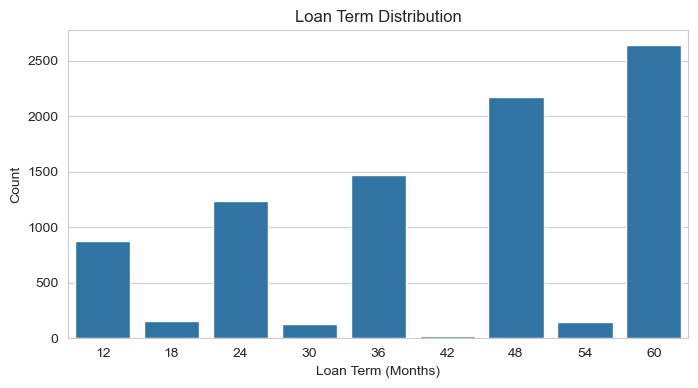

In [13]:
# 3. Loan Term Distribution
plt.figure(figsize=(8, 4))
sns.countplot(x=df['Term'])
plt.title("Loan Term Distribution")
plt.xlabel("Loan Term (Months)")
plt.ylabel("Count")
plt.show()


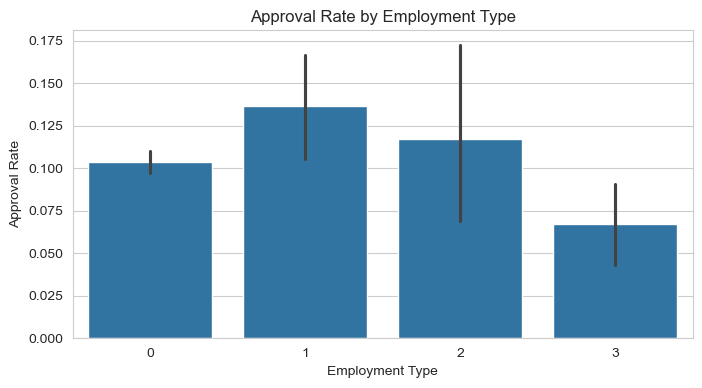

In [14]:
# 4. Employment Type vs. Loan Success
plt.figure(figsize=(8, 4))
sns.barplot(x=df['EmploymentType'], y=df['Success'])
plt.title("Approval Rate by Employment Type")
plt.xlabel("Employment Type")
plt.ylabel("Approval Rate")
plt.show()


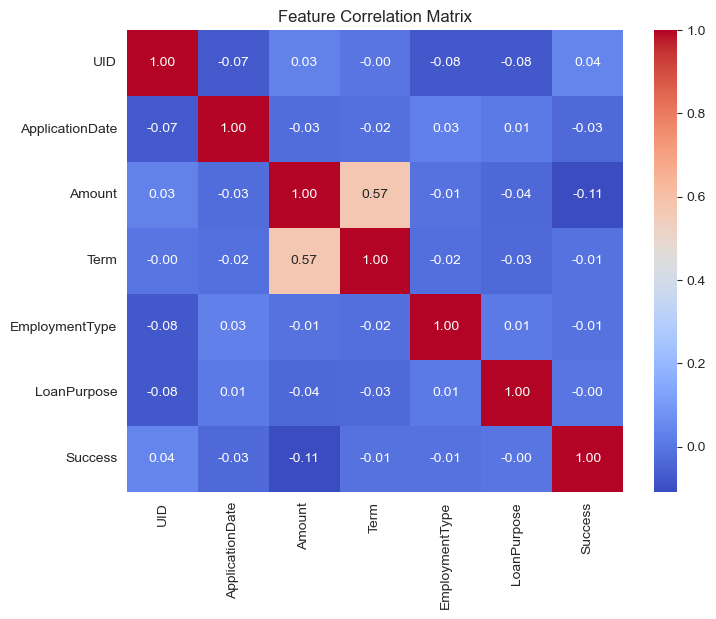

In [15]:
# 6. Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

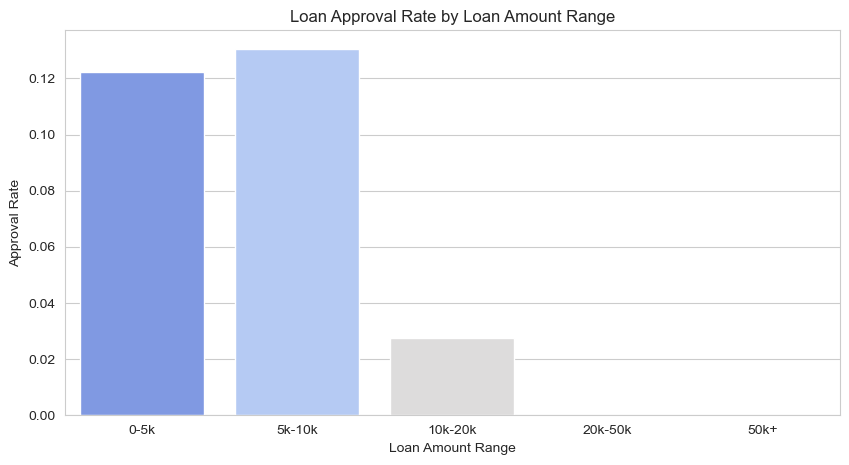

In [16]:
# 1. Success Rate vs. Loan Amount (Binned)
df['LoanAmountBin'] = pd.cut(df['Amount'], bins=[0, 5000, 10000, 20000, 50000, 100000], labels=['0-5k', '5k-10k', '10k-20k', '20k-50k', '50k+'])
plt.figure(figsize=(10, 5))
sns.barplot(x=df['LoanAmountBin'], y=df['Success'], ci=None, palette="coolwarm")
plt.title("Loan Approval Rate by Loan Amount Range")
plt.xlabel("Loan Amount Range")
plt.ylabel("Approval Rate")
plt.show()

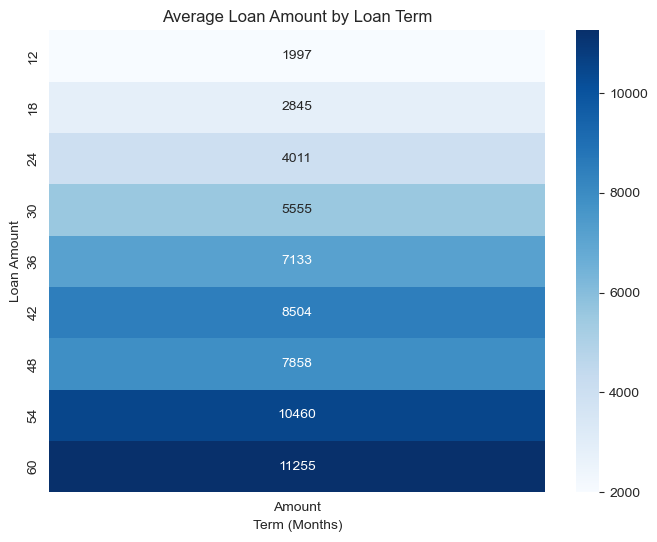

In [17]:
# 2. Loan Term vs. Loan Amount Heatmap
pivot_table = df.pivot_table(values='Amount', index='Term', aggfunc='mean')
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt=".0f")
plt.title("Average Loan Amount by Loan Term")
plt.xlabel("Term (Months)")
plt.ylabel("Loan Amount")
plt.show()

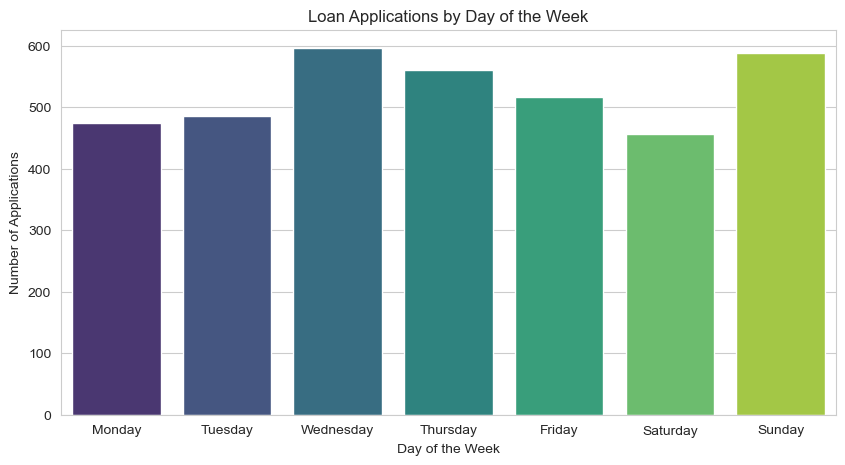

In [18]:
# 3. Loan Application Trend by Day of the Week
df['DayOfWeek'] = df['ApplicationDate'].dt.day_name()
plt.figure(figsize=(10, 5))
sns.countplot(x=df['DayOfWeek'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette="viridis")
plt.title("Loan Applications by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Applications")
plt.show()

### <i> Data Preprocessing </i>

In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset (assuming df is already loaded)
df = df.copy()  # Make a copy to avoid modifying the original data

# 1. Handling Missing Values
print("Missing Values Before Processing:\n", df.isnull().sum())

# Drop rows where 'ApplicationDate' is missing since it's crucial for time-based analysis
df.dropna(subset=['ApplicationDate'], inplace=True)

# Confirm missing values are handled
print("Missing Values After Processing:\n", df.isnull().sum())

# 2. Convert ApplicationDate to datetime and extract useful features
df['ApplicationDate'] = pd.to_datetime(df['ApplicationDate'], errors='coerce')

# Extracting Date-Based Features
df['Application_Year'] = df['ApplicationDate'].dt.year
df['Application_Month'] = df['ApplicationDate'].dt.month
df['Application_Day'] = df['ApplicationDate'].dt.day
df['Application_Weekday'] = df['ApplicationDate'].dt.weekday  # 0 = Monday, 6 = Sunday

# Drop the original date column after extracting features
df.drop(columns=['ApplicationDate'], inplace=True)

# 3. Encoding Categorical Variables
# Encoding EmploymentType (Label Encoding)
employment_encoder = LabelEncoder()
df['EmploymentType_Encoded'] = employment_encoder.fit_transform(df['EmploymentType'])

# One-Hot Encoding LoanPurpose (since it may have multiple unique values)
df = pd.get_dummies(df, columns=['LoanPurpose'], prefix='Loan')

# Drop original categorical column after encoding
df.drop(columns=['EmploymentType'], inplace=True)

# 4. Feature Engineering: Creating new meaningful features
df['Loan_to_Term_Ratio'] = df['Amount'] / df['Term']  # Loan amount per month of term
df['Loan_Size_Category'] = pd.cut(df['Amount'], bins=[0, 5000, 20000, 50000, 100000, np.inf], labels=[1, 2, 3, 4, 5])  # Categorizing loan size

# 5. Feature Scaling
scaler = StandardScaler()
df[['Amount', 'Term', 'Loan_to_Term_Ratio']] = scaler.fit_transform(df[['Amount', 'Term', 'Loan_to_Term_Ratio']])

# 6. Final Cleaned Dataset
print("\nProcessed Dataset:\n", df.head())




Missing Values Before Processing:
 UID                   0
ApplicationDate    5171
Amount                0
Term                  0
EmploymentType        0
LoanPurpose           0
Success               0
LoanAmountBin         0
DayOfWeek          5171
dtype: int64
Missing Values After Processing:
 UID                0
ApplicationDate    0
Amount             0
Term               0
EmploymentType     0
LoanPurpose        0
Success            0
LoanAmountBin      0
DayOfWeek          0
dtype: int64

Processed Dataset:
        UID    Amount      Term  Success LoanAmountBin  DayOfWeek  \
0  4921736 -1.022346  1.119803        0          0-5k   Saturday   
1  1241981 -0.833069  1.119803        0          0-5k   Thursday   
2  5751748  2.384646  1.119803        0       10k-20k   Saturday   
4   227377 -0.454514 -0.344716        0          0-5k  Wednesday   
5   231767  0.529728  1.119803        0       10k-20k  Wednesday   

   Application_Year  Application_Month  Application_Day  Application_W

### <i> Modeling </i>
### <i> Logistic Regression </i>

In [22]:
# Ensure all categorical variables are properly encoded
X = df.drop(columns=['Success', 'UID'])  # Drop target and unique identifier

# Convert categorical columns to numeric (if any are left)
X = pd.get_dummies(X, drop_first=True)  

# Fill any missing values that may have been introduced
X.fillna(0, inplace=True)

# Convert to float to ensure compatibility with ML models
X = X.astype(float)

# Define target variable
y = df['Success']

# Train-test split
from sklearn.model_selection import train_test_split



# Split data into train and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("📌 Logistic Regression Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



📌 Logistic Regression Model Evaluation
Accuracy: 0.907608695652174

Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       668
           1       0.00      0.00      0.00        68

    accuracy                           0.91       736
   macro avg       0.45      0.50      0.48       736
weighted avg       0.82      0.91      0.86       736


Confusion Matrix:
 [[668   0]
 [ 68   0]]


### <i> Random Forest CLassifier </i>

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("📌 Random Forest Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


📌 Random Forest Model Evaluation
Accuracy: 0.9035326086956522

Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       668
           1       0.00      0.00      0.00        68

    accuracy                           0.90       736
   macro avg       0.45      0.50      0.47       736
weighted avg       0.82      0.90      0.86       736


Confusion Matrix:
 [[665   3]
 [ 68   0]]


### <i> XGB Classifier </i>

In [26]:
from xgboost import XGBClassifier

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("📌 XGBoost Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


📌 XGBoost Model Evaluation
Accuracy: 0.8967391304347826

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95       668
           1       0.28      0.07      0.12        68

    accuracy                           0.90       736
   macro avg       0.60      0.53      0.53       736
weighted avg       0.85      0.90      0.87       736


Confusion Matrix:
 [[655  13]
 [ 63   5]]


#### <i> Comparison Of All Models </i>

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

# Evaluate each model
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

# Store results
results = {name: evaluate_model(model, X_test, y_test) for name, model in models.items()}


In [29]:
import pandas as pd

# Convert results dictionary to DataFrame
results_df = pd.DataFrame(results).T

# Sort models by highest Accuracy
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Display comparison table
print("📊 Model Performance Comparison:")
print(results_df)


📊 Model Performance Comparison:
                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.907609   0.000000  0.000000  0.000000
Random Forest        0.903533   0.000000  0.000000  0.000000
XGBoost              0.896739   0.277778  0.073529  0.116279


<Figure size 1000x600 with 0 Axes>

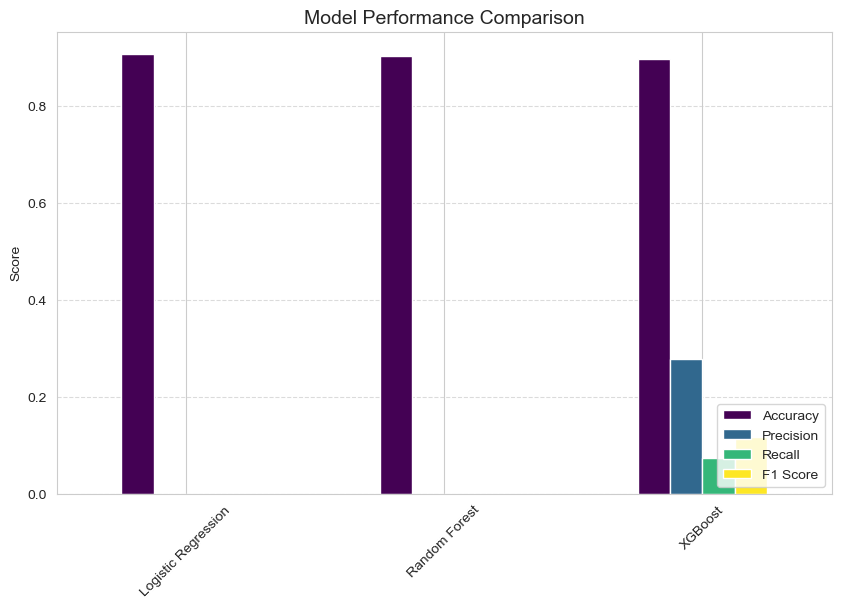

In [30]:
import matplotlib.pyplot as plt

# Plot bar chart for comparison
plt.figure(figsize=(10,6))
results_df.plot(kind="bar", figsize=(10,6), colormap="viridis")
plt.title("Model Performance Comparison", fontsize=14)
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()
